### 자전거 수요 예측
* 자전거 수요를 파악하여 효율적으로 자전거 대여수를 예측하고자 한다
* 월, 일, 시 별로 언제 자전거를 많이 대여하는지를 파악한다
>
* 컬럼
    - datetime : 대여 날짜
    - season : 1(봄), 2(여름), 3(가을), 4(겨울)
    - holiday : 1(토,일 주말을 제외한 국경일 등의 휴일), 0(휴일이 아닌 날)
    - workingday : 1(토, 일 주말 및 휴일이 아닌 주중), 0(주말 및 휴일)
    - weather : 1(맑음), 2(흐림), 3(가벼운 눈, 비), 4(심한 눈, 비)
    - temp : 온도(섭씨)
    - atemp : 체감온도(섭씨)
    - humidity : 습도
    - windspeed : 풍속
    - casual : 비등록 대여 횟수
    - registered : 등록 대여 횟수
    - count : 총 대여 횟수

### 데이터 셋 로드

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 전처리

#### 자료형 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df['datetime']= df['datetime'].apply(pd.to_datetime)
#df['datetime'] = pd.to_datetime(df['datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
#apply

df['day'] = df['datetime'].apply(lambda x : x.day)
df['hour'] = df['datetime'].apply(lambda x : x.hour)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [8]:
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0.0,0.0,0.0,0.0,0.0
casual,3,8,5,3,0


### EDA(데이터 탐색)
* 시간대 별 자전거 빌리는 횟수 확인
>
* agg : 특정 컬럼을 종합적으로 연산해주는 기능

In [11]:
d = df.groupby('hour').agg({'count':sum}).reset_index()
d

,hour,count
0,0,25088
1,1,15372
2,2,10259
3,3,5091
4,4,2832
5,5,8935
6,6,34698
7,7,96968
8,8,165060
9,9,100910


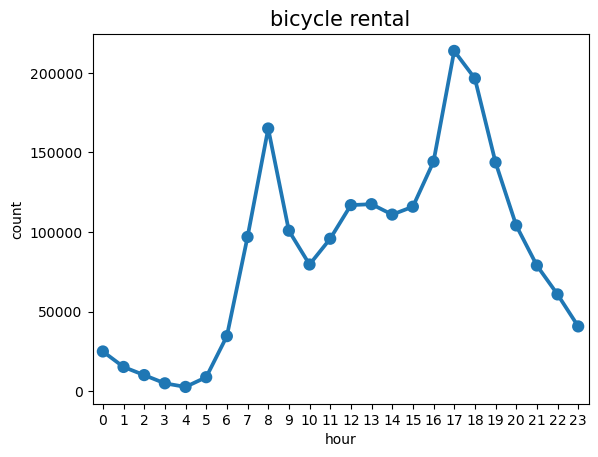

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(data = d, x='hour', y='count')
plt.title('bicycle rental', fontsize=15,color='black')
plt.show()

* hue를 이용하여 쉬는 날과 일하는 날을 구분
* workingday : 0(쉬는날), 1 (일하는날)


In [13]:
d= df.groupby(['hour', 'workingday']).agg({'count':sum}).reset_index()

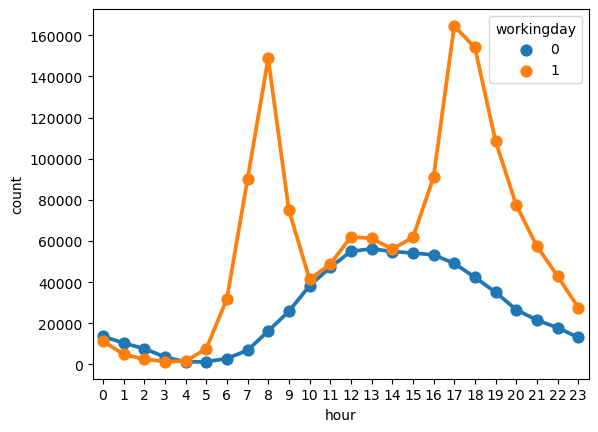

In [15]:
sns.pointplot(data=d,x='hour',y='count', hue='workingday')
plt.show()

#### 월별 자전거 현황

In [16]:
d =\
        df.groupby(['hour','month']).agg({'count':sum}).reset_index()

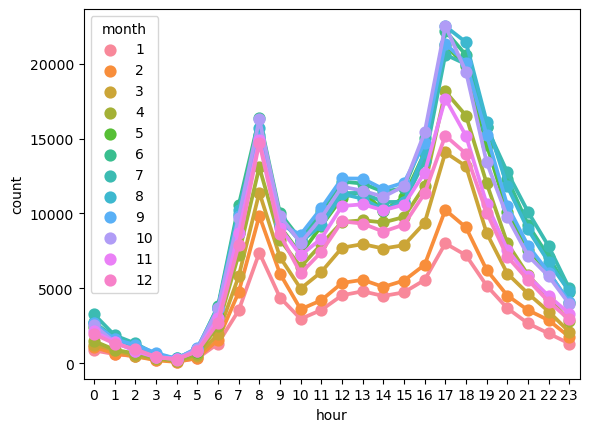

In [17]:
sns.pointplot(data=d, x='hour',y='count',hue='month')
plt.show()

#### 날씨에 따른 분류
* weather : 1(맑음), 2(흐림), 3(가벼운 눈, 비), 4(심한 눈, 비)


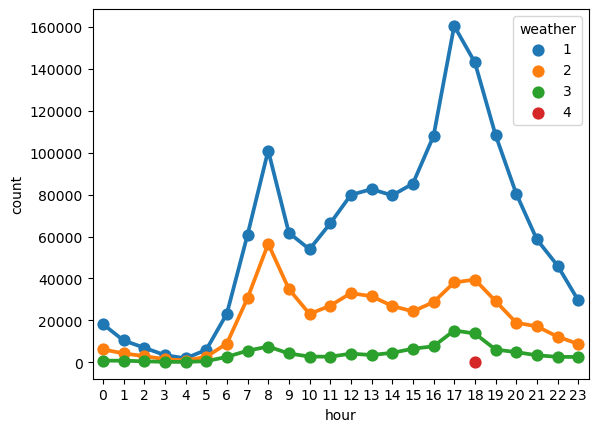

In [18]:
d = df.groupby(['hour','weather']).agg({'count':sum}).reset_index()
sns.pointplot(data=d,x='hour',y='count',hue='weather')
plt.show()

#### 회원과 비회원 확인

<AxesSubplot:xlabel='month', ylabel='casual'>

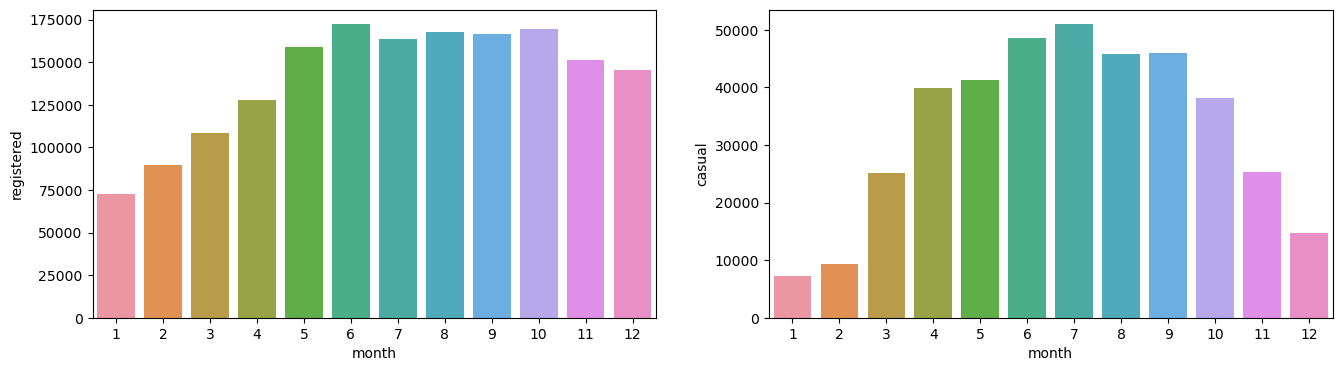

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,4)
d =df.groupby(['month']).agg({'registered':sum, 'casual':sum}).reset_index()
sns.barplot(data=d, x='month', y='registered', ax= ax1)
sns.barplot(data=d, x='month', y='casual', ax= ax2)

In [20]:
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0.0,0.0,0.0,0.0,0.0
casual,3,8,5,3,0


In [22]:
df['temp_int']=df['temp'].apply(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  temp_int    10886 non-

    temp_int  workingday  registered  casual  count
0          0           1         538       6    544
1          1           1         176       7    183
2          2           1         204      11    215
3          3           0          75       1     76
4          3           1         128       8    136
..       ...         ...         ...     ...    ...
72        37           1        5359    1413   6772
73        38           0         658     323    981
74        38           1         516     175    691
75        39           0        1269     638   1907
76        41           0         192     102    294

[77 rows x 5 columns]


<AxesSubplot:xlabel='temp_int', ylabel='count'>

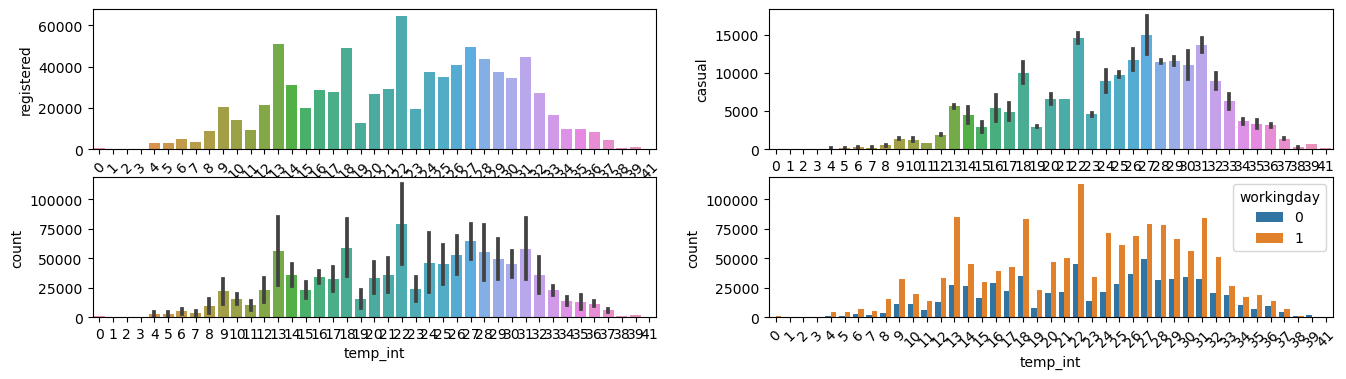

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,4)
plt.xticks(rotation=45)

d = df.groupby(['temp_int','workingday']).agg({'registered':sum,'casual':sum,'count':sum}).reset_index()
ax1_sns = sns.barplot(data=d, x='temp_int',y='registered', ax= ax1, ci=False)
ax1_sns.set_xticklabels(ax1_sns.get_xticklabels(),rotation=45)

print(d)

sns.barplot(data=d, x='temp_int',y='casual', ax= ax2)
sns.barplot(data=d, x='temp_int',y='count', ax= ax3)
sns.barplot(data=d, x='temp_int',y='count',hue ='workingday', ax= ax4)

In [30]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'temp_int'],
      dtype='object')

In [31]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour',]
    
label = 'count'
X, y = df[features], df[label]

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = \
                    train_test_split(X,y, test_size=0.3, random_state=62)

In [35]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

print('train score : ', rfr.score(X_train,y_train))
print('test score : ', rfr.score(X_test,y_test))

train score :  0.9916104858642696
test score :  0.9429121552004269


### GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : range(5,100,10),
    'max_depth' : range(4,11,2),
    'min_samples_split' : range(4,21,4)
}
rfr = RandomForestRegressor()
grid_cv = GridSearchCV(rfr, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('최적의 하이퍼파라미터 : ',grid_cv.best_params_)
print('train : ',grid_cv.score(X_train,y_train))
print('test : ',grid_cv.score(X_test,y_test))

최적의 하이퍼파라미터 :  {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 95}
train :  0.9544625178620614
test :  0.9282035988067697


In [41]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,temp_int
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,9


In [40]:
grid_cv.predict([[1,0,0,1,9,14.02,80,0.0,2011,1,1,2]])

array([32.8438999])

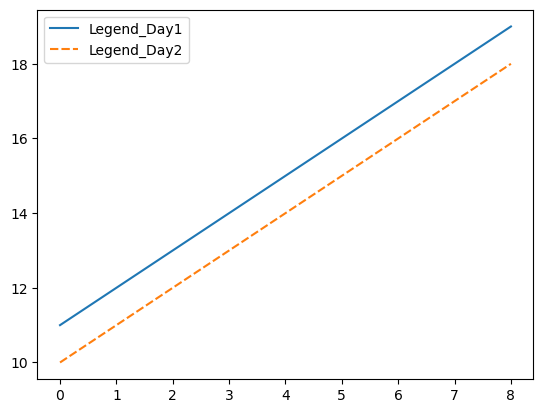

In [42]:
df_result = pd.DataFrame({"y_test ": [11,12,13,14,15,16,17,18,19],
                    "line_test" : [10,11,12,13,14,15,16,17,18]})

sns.lineplot(data = df_result)
plt.legend(labels=["Legend_Day1","Legend_Day2"])

In [49]:
range_start = 0
range_end =30

line_test = grid_cv.predict(X_test)

y_test_reset = y_test[range_start:range_end].reset_index()
y_test_reset['pred_test']= line_test[range_start:range_end]

y_test_reset['pred_test'] = y_test_reset['pred_test'].apply(int)
print(y_test_reset)

    index  count  pred_test
0    7762    453        405
1    7783    448        448
2    4006    136         80
3    7395    263        273
4   10884    129        145
5    2940    117        153
6    8644    310        279
7     371     18         28
8    9661    185        149
9   10099      7          7
10   6456    102         92
11   7608    347        338
12   8718    450        520
13  10210    192        240
14   4703     10         10
15  10024     89         90
16   6854    158        163
17   2824    163        178
18   7492    363        280
19  10847    326        323
20   4760    200        229
21   6787     81         64
22   9137      5          9
23   2097     32         95
24   2224    180        152
25   2794    432        446
26   8591    657        658
27   5123     33         51
28   4551    553        403
29   2651    218        190


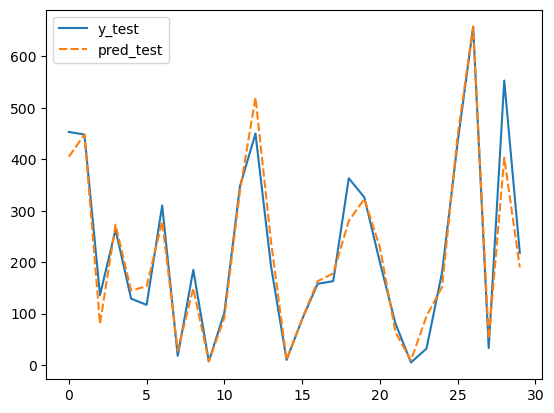

In [50]:
sns.lineplot(data=y_test_reset[['count', 'pred_test']])
plt.legend(labels=['y_test','pred_test'])
plt.show()